In [126]:
import numpy as np
import math 
import statistics
import pandas as pd
import pandas_profiling as pp
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
%matplotlib inline

In [127]:
df=pd.read_csv("Facebook live seller data.csv")
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [128]:
#Cleaning and Preprocessing
 #Processing all columns 
  #Removing rows with less than 0 entries 

df = df[df.status_id >= 0]
df = df[df.num_reactions >= 0] 
df = df[df.num_comments >= 0]
df = df[df.num_shares >= 0]  
df = df[df.num_likes >= 0]  
df = df[df.num_loves >= 0]  
df = df[df.num_wows >= 0]  
df = df[df.num_hahas >= 0] 
df = df[df.num_sads >= 0]
df = df[df.num_angrys  >= 0]

#Removing all null entry rows  
df = df.dropna(how = "any")


df    

status_id status_type  status_published  num_reactions  num_comments  \
0             1       video    4/22/2018 6:00            529           512   
1             2       photo   4/21/2018 22:45            150             0   
2             3       video    4/21/2018 6:17            227           236   
3             4       photo    4/21/2018 2:29            111             0   
4             5       photo    4/18/2018 3:22            213             0   
...         ...         ...               ...            ...           ...   
7045       7046       photo    9/24/2016 2:58             89             0   
7046       7047       photo   9/23/2016 11:19             16             0   
7047       7048       photo   9/21/2016 23:03              2             0   
7048       7049       photo    9/20/2016 0:43            351            12   
7049       7050       photo  09-10-2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0            262        432         92         3          1         1   
1              0        150          0         0          0         0   
2             57        204         21         1          1         0   
3              0        111          0         0          0         0   
4              0        204          9         0          0         0   
...          ...        ...        ...       ...        ...       ...   
7045           0         89          0         0          0         0   
7046           0         14          1         0          1         0   
7047           0          1          1         0          0         0   
7048          22        349          2         0          0         0   
7049           0         17          0         0          0         0   

      num_angrys  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
7045           0  
7046           0  
7047           0  
7048           0  
7049           0  

[7050 rows x 12 columns]

In [129]:
# Q1) Can we predict no. of comments based on no. of reaction?

In [130]:
#To answer this question we need to build a regression model with no. of comments as dependent variable and no. of reactions as indenpendent model and check the accuracy of the model

coefficient of determination for training set: 0.025360363135332853
coefficient of determination for test set: 0.012648860683227237


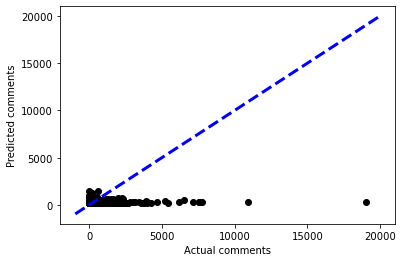

In [131]:
X = df[['num_reactions']]
Y = df['num_comments']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)
 


#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

# Plot outputs 
# Visualizing predicted price vs actual price performance 

plt.scatter(Y_test,y_pred, color="black")
plt.xlabel("Actual comments")
plt.ylabel("Predicted comments")


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='b', lw=3, scalex=True, scaley=True)

plt.show()

In [21]:
#We see that the model is not accurate and is not able to predict no. of comments
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

879.6933435030252

In [23]:
# Q2) Can we build a model to predict no. of comments with reasonable accuracy?

# To answer this question, pulling features into the model and checking 

In [42]:
X = df[['num_reactions','num_shares']]
Y = df['num_comments']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.4365168501963137
coefficient of determination for test set: 0.246240130057094


In [39]:
#Checking cross fold validation RMSE
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

686.6501849776392

In [ ]:
#We see that both Cross fold RMSE and coeffcient of determination have improved and hence we would keep this feature in the model

In [29]:
X = df[['num_reactions','num_shares','num_likes']]
Y = df['num_comments']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.4505158306371716
coefficient of determination for test set: 0.09696696269657779


In [28]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

687.7499017491324

In [ ]:
#We see that RMSE and coeffcient of determination have not improved, hence dropping the feature

In [30]:
X = df[['num_reactions','num_shares','num_loves']]
Y = df['num_comments']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.4626212152864768
coefficient of determination for test set: 0.2618702746288778


In [31]:
#We see that the model is not accurate and is not able to predict no. of comments
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

687.9241728967745

In [ ]:
#We see that RMSE and coeffcient of determination have not improved, hence dropping the feature

In [50]:
X = df[['status_type','num_reactions','num_shares']]
Y = df['num_comments']

# I specifically reordered the columns so that the categorical columns were first (ie. columns 0-6)
preprocessor = make_column_transformer( (OneHotEncoder(),[0]),remainder="passthrough")
X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.4340643873431743
coefficient of determination for test set: 0.3716121738307231


In [37]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

683.2593268056386

In [ ]:
#We see that cross val RMSE is lower now and hence keeping the feature  

In [70]:
# Checking the model with above 3 features and all other features 
X = df[['status_type','num_reactions','num_shares','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
Y = df['num_comments']

# I specifically reordered the columns so that the categorical columns were first (ie. columns 0-6)
preprocessor = make_column_transformer( (OneHotEncoder(),[0]),remainder="passthrough")
X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.42990790452699545
coefficient of determination for test set: 0.5437883695554693


In [71]:
#We see that the model is not accurate and is not able to predict no. of comments
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

671.4630445169155

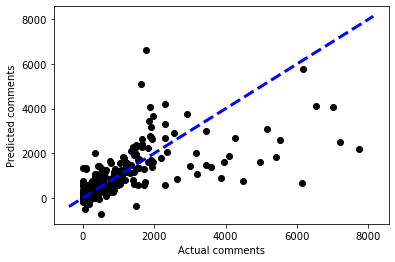

In [73]:
#We see that the cross val RMSE score is lower now and hence keeping the feature  

#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

# Plot outputs 
# Visualizing predicted comments vs actual comments performance 

plt.scatter(Y_test,y_pred, color="black")
plt.xlabel("Actual comments")
plt.ylabel("Predicted comments")


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='b', lw=3, scalex=True, scaley=True)

plt.show()

In [ ]:
# We see that the model has improved and now we can predict no. of comments with reasonable accuracy

In [ ]:
# Moving on to new question
# Q3) Can we predict no. of shares? Does no. of shares depend on no. of reactions? 

coefficient of determination for training set: 0.06974935159788076
coefficient of determination for test set: 0.024959070680362183


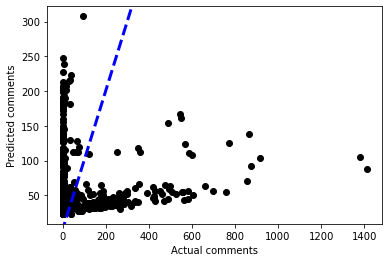

In [74]:
X = df[['num_reactions']]
Y = df['num_shares']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)
 


#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

# Plot outputs 
# Visualizing predicted price vs actual price performance 

plt.scatter(Y_test,y_pred, color="black")
plt.xlabel("Actual shares")
plt.ylabel("Predicted shares")


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='b', lw=3, scalex=False, scaley=False)

plt.show()

In [75]:
#We see that the model is not accurate and is not able to predict no. of shares
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

127.57260427895184

In [76]:
#Trying different features 
X = df[['status_type','num_reactions']]
Y = df['num_shares']

# I specifically reordered the columns so that the categorical columns were first (ie. columns 0-6)
preprocessor = make_column_transformer( (OneHotEncoder(),[0]),remainder="passthrough")
X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.22378304805101779
coefficient of determination for test set: 0.1819835324118485


In [78]:
# We see that the model is not accurate and is not able to predict no. of shares
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

117.00286072979229

In [ ]:
# We see that coeffcient of determination and RMSE have improved and hence keeping the features  

In [79]:
#Trying different features 
X = df[['status_type','num_reactions','num_comments']]
Y = df['num_shares']

# I specifically reordered the columns so that the categorical columns were first (ie. columns 0-6)
preprocessor = make_column_transformer( (OneHotEncoder(),[0]),remainder="passthrough")
X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)

coefficient of determination for training set: 0.4625385753344854
coefficient of determination for test set: 0.5400324152001696


In [80]:
# We see that the model is not accurate and is not able to predict no. of shares
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

96.35826788962997

In [ ]:
#We see that coeffcient of determination and RMSE have improved and hence keeping the features  

In [81]:
#Trying all reaction features 
X = df[['status_type','num_reactions','num_comments','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
Y = df['num_shares']

# I specifically reordered the columns so that the categorical columns were first (ie. columns 0-6)
preprocessor = make_column_transformer( (OneHotEncoder(),[0]),remainder="passthrough")
X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)



coefficient of determination for training set: 0.7394694097980463
coefficient of determination for test set: 0.7235772066151562


In [82]:
#We see that the model is not accurate and is not able to predict no. of shares
cv = KFold(n_splits=5, random_state=1, shuffle=True) 
model = LinearRegression().fit(X, Y)

scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

math.sqrt(statistics.mean(abs(scores)))

68.64203267193093

In [ ]:
#We see that coeffcient of determination and RMSE have improved and hence keeping the features 
#Hence our final model

In [85]:
X = df[['status_type','num_reactions','num_comments','num_loves','num_wows','num_hahas','num_sads','num_angrys']]
Y = df['num_shares']

# I specifically reordered the columns so that the categorical columns were first (ie. columns 0-6)
preprocessor = make_column_transformer( (OneHotEncoder(),[0]),remainder="passthrough")
X = preprocessor.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

model = LinearRegression().fit(X_train, Y_train)

r_train_sq = model.score(X_train, Y_train)

print('coefficient of determination for training set:', r_train_sq)

r_test_sq=model.score(X_test, Y_test)

print('coefficient of determination for test set:', r_test_sq)


coefficient of determination for training set: 0.7221045494012097
coefficient of determination for test set: 0.7985550919950064


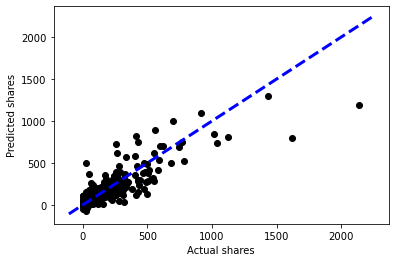

In [101]:
#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

#print('intercept:', model.intercept_)
#print('slope:', model.coef_)
y_pred = model.predict(X_test)

# Plot outputs 
# Visualizing predicted price vs actual price performance 

plt.scatter(Y_test,y_pred, color="black")
plt.xlabel("Actual shares")
plt.ylabel("Predicted shares")


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='b', lw=3, scalex=True, scaley=True)

plt.show()

In [ ]:
#We can now predict no. of shares with reasonable accuracy

In [ ]:
# Moving on to a new question
# Q4) Can we identify clustets of high user engagement(reactions+shares) posts? 

# To answer the question we are using K means clustering to cluster posts on user engagement 

In [137]:
centers = 4 #predefined centers for data distribution
cluster_std = 0.60 #setting the standard deviation of the data
#-----------------
max_clusters = 15 # maximum clusters to run KMeans on
max_iter = 300 # maximum number of iterations
n_init = 10 # Number of time the k-means algorithm will be run with different centroid seeds
random_state = 0 # random number for centroid generation

In [145]:


def make_custom_dataset(FILENAME):
  
 df = pd.read_csv(FILENAME)
   
 #Cleaning and Preprocessing
 #Processing all columns 

 #Removing all null entry rows  
 df = df.dropna(how = "any")

#Dropping categroical columns
 df.drop(['status_type','status_published'], axis=1, inplace=True)

#Removing rows with less than 0 entries 

    
    
 df = df[df.status_id >= 0]
 df = df[df.num_reactions >= 0] 
 df = df[df.num_comments >= 0]
 df = df[df.num_shares >= 0]  
 df = df[df.num_likes >= 0]  
 df = df[df.num_loves >= 0]  
 df = df[df.num_wows >= 0]  
 df = df[df.num_hahas >= 0] 
 df = df[df.num_sads >= 0]
 df = df[df.num_angrys  >= 0]





 print(df)
    
 scaler = StandardScaler()
 df=scaler.fit_transform(df)
 df=normalize(df)
 print(df)
    
  # Chose no. of reactions and no. of shares as features to see insights into user engagement 
  

 X = df[:, [3, 5]] #dataframe -> numpy array

 return X

In [147]:
 X = make_custom_dataset('Facebook live seller data.csv')
 X

      status_id  num_reactions  num_comments  num_shares  num_likes  \
0             1            529           512         262        432   
1             2            150             0           0        150   
2             3            227           236          57        204   
3             4            111             0           0        111   
4             5            213             0           0        204   
...         ...            ...           ...         ...        ...   
7045       7046             89             0           0         89   
7046       7047             16             0           0         14   
7047       7048              2             0           0          1   
7048       7049            351            12          22        349   
7049       7050             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  
0            92         3          1         1           0  
1             0         0

array([[ 0.51268437,  0.60276393],
       [-0.16479286, -0.17254637],
       [ 0.0731523 ,  0.1173334 ],
       ...,
       [-0.15585199, -0.15036455],
       [-0.07424658, -0.14551076],
       [-0.15677807, -0.16415448]])

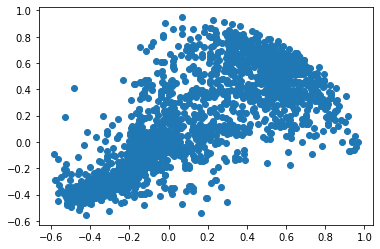

In [148]:
# visualize the points 
plt.scatter(X[:,0], X[:,1])

In [149]:
# run kmeans for various cluster sizes
def run_kmeans(data,max_clusters,max_iter,n_init,random_state):
  elbow_values = []
  for i in range(1, max_clusters):
      kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=random_state)
      kmeans.fit(data)
      elbow_values.append(kmeans.inertia_) #calculates squared error
  return elbow_values

In [150]:
# initiate maximum cluster size
max_clusters = 15

# get all the elbow values to plot graph
elbow_values = run_kmeans(X,max_clusters,max_iter,n_init,random_state)

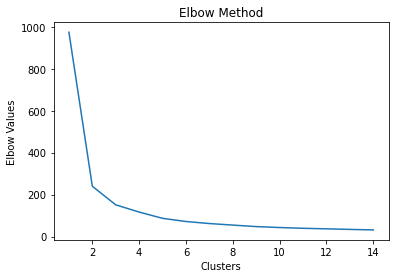

In [151]:
# plot graph for analyzing the optimal cluster size
plt.plot(range(1, max_clusters), elbow_values)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Elbow Values')
plt.show()

In [155]:
def calculate_centers(data,optimal_cluster_size,max_iter,n_init,random_state):
  kmeans = KMeans(n_clusters=optimal_cluster_size, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=random_state)

  # predict the cluster labels
  pred_y = kmeans.fit_predict(data)

  # plot the new cluster centers
  plt.scatter(data[:,0], data[:,1])
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red')
  plt.xlabel("num_reactions")
  plt.ylabel("num_shares")
  plt.show()


  
 

  # create a combined dataframe of features and labels
  combined_dataframe = pd.DataFrame(
    {'num_reactions': data[:,0],
     'num_shares': data[:,1],
     'Predicted Label': pred_y
    })
  
  return combined_dataframe

In [156]:
def plot_graphs(data,optimal_cluster_size,max_iter,n_init,random_state):
  kmeans = KMeans(n_clusters=optimal_cluster_size, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=random_state)

  # predict the cluster labels
  pred_y = kmeans.fit_predict(data)

  # plot the new cluster centers
  
  plt.scatter(X[pred_y==0, 0], X[pred_y==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(X[pred_y==1, 0], X[pred_y==1, 1], s=100, c='blue', label ='Cluster 2')


  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

  plt.xlabel('no. of reactions')
  plt.ylabel('no. of shares')
  plt.show()
  
  
  return None

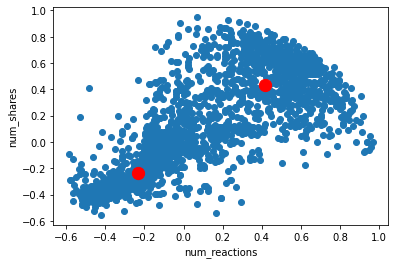

      num_reactions  num_shares  Predicted Label
0          0.512684    0.602764                1
1         -0.164793   -0.172546                0
2          0.073152    0.117333                0
3         -0.163230   -0.170910                0
4         -0.168462   -0.051670                0
...             ...         ...              ...
7045      -0.162064   -0.169689                0
7046      -0.157567   -0.152019                0
7047      -0.155852   -0.150365                0
7048      -0.074247   -0.145511                0
7049      -0.156778   -0.164154                0

[7050 rows x 3 columns]


In [160]:
# decide optimal cluster size based on analysis
optimal_cluster_size = 2

# return the features + label dataframe
combined_dataframe = calculate_centers(X,optimal_cluster_size,max_iter,n_init,random_state)

print(combined_dataframe)

In [157]:
def plot_graphs(data,optimal_cluster_size,max_iter,n_init,random_state):
  kmeans = KMeans(n_clusters=optimal_cluster_size, init='k-means++', max_iter=max_iter, n_init=n_init, random_state=random_state)

  # predict the cluster labels
  pred_y = kmeans.fit_predict(data)

  # plot the new cluster centers
  
  plt.scatter(X[pred_y==0, 0], X[pred_y==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(X[pred_y==1, 0], X[pred_y==1, 1], s=100, c='blue', label ='Cluster 2') 
    

  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')

  plt.xlabel('no. of reactions')
  plt.ylabel('no. of shares')
  plt.show()
  
  
  return None

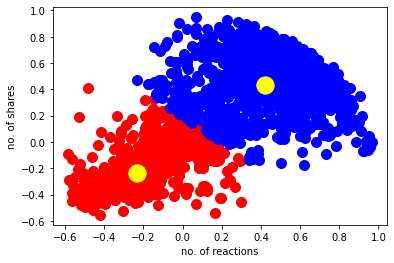

In [158]:
 plot_graphs(X,optimal_cluster_size,max_iter,n_init,random_state)

In [159]:
#We can clearly see two clusters
#The red cluster has low user engagement posts(reactions and shares)
#The blue cluster has high user engagement posts
#It would be useful to study as to why blue cluster posts have a higher user engagement and what differentiates them from red cluster posts

In [181]:
# Answering basic questions: 
# Q5) Distribution of reactions among like,loves,wow,haha,sads,angrys



df=pd.read_csv("Facebook live seller data.csv")



In [182]:
df.describe(include='all')

status_id status_type status_published  num_reactions  num_comments  \
count   7050.000000        7050             7050    7050.000000   7050.000000   
unique          NaN           4             6913            NaN           NaN   
top             NaN       photo   3/20/2018 1:54            NaN           NaN   
freq            NaN        4288                3            NaN           NaN   
mean    3525.500000         NaN              NaN     230.117163    224.356028   
std     2035.304031         NaN              NaN     462.625309    889.636820   
min        1.000000         NaN              NaN       0.000000      0.000000   
25%     1763.250000         NaN              NaN      17.000000      0.000000   
50%     3525.500000         NaN              NaN      59.500000      4.000000   
75%     5287.750000         NaN              NaN     219.000000     23.000000   
max     7050.000000         NaN              NaN    4710.000000  20990.000000   

         num_shares    num_likes    num_loves     num_wows    num_hahas  \
count   7050.000000  7050.000000  7050.000000  7050.000000  7050.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      40.022553   215.043121    12.728652     1.289362     0.696454   
std      131.599965   449.472357    39.972930     8.719650     3.957183   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000    17.000000     0.000000     0.000000     0.000000   
50%        0.000000    58.000000     0.000000     0.000000     0.000000   
75%        4.000000   184.750000     3.000000     0.000000     0.000000   
max     3424.000000  4710.000000   657.000000   278.000000   157.000000   

           num_sads   num_angrys  
count   7050.000000  7050.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       0.243688     0.113191  
std        1.597156     0.726812  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     0.000000  
75%        0.000000     0.000000  
max       51.000000    31.000000

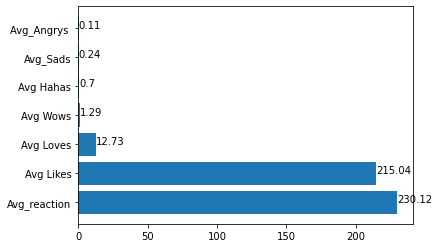

In [196]:
avg_reactions = df["num_reactions"].mean()
avg_likes= df["num_likes"].mean()
avg_loves= df["num_loves"].mean()
avg_wows= df["num_wows"].mean()
avg_hahas= df["num_hahas"].mean()
avg_sads= df["num_sads"].mean()
avg_angrys= df["num_angrys"].mean()

avg_reactions=round(avg_reactions,2)
avg_likes=round(avg_likes,2)
avg_loves=round(avg_loves,2)
avg_wows=round(avg_wows,2)
avg_hahas=round(avg_hahas,2)
avg_sads=round(avg_sads,2)
avg_angrys=round(avg_angrys,2)

X = ['Avg_reaction','Avg Likes', 'Avg Loves', 'Avg Wows', 'Avg Hahas', 'Avg_Sads', 'Avg_Angrys ']
Y = [avg_reactions,avg_likes,avg_loves,avg_wows,avg_hahas,avg_sads,avg_angrys]


plt.barh(X, Y)
 
for index, value in enumerate(Y):
    plt.text(value, index,
             str(value))
plt.show()

In [197]:
#Majority of reactions is made up of likes follwed by loves

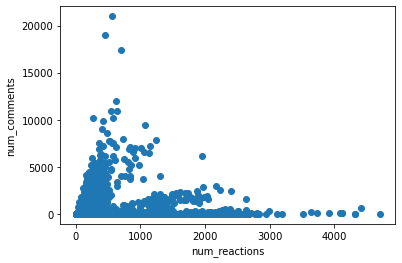

In [199]:
xpoints = df["num_reactions"]
ypoints = df["num_comments"]
plt.xlabel("num_reactions")
plt.ylabel("num_comments")
plt.scatter(xpoints, ypoints)
plt.show()

In [ ]:
#Not much can be inferred 

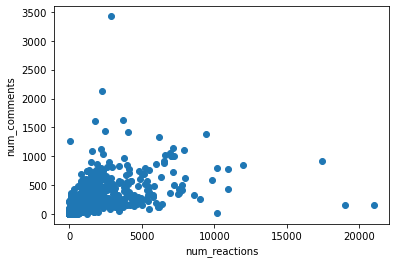

In [200]:
xpoints = df["num_comments"]
ypoints = df["num_shares"]
plt.xlabel("num_reactions")
plt.ylabel("num_comments")
plt.scatter(xpoints, ypoints)
plt.show()

In [ ]:
#Comments and reactions seem to be directly proportional on avg

In [204]:
#Distribution of type of posts
count = pd.Series(df['status_type']).value_counts()
print(count)



photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64


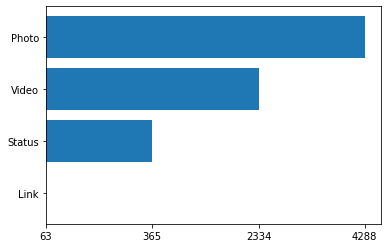

In [210]:
X = ['Link','Status','Video','Photo']
Y = ['63','365','2334','4288']


plt.barh(X, Y)
 
plt.show()

In [ ]:
#Majority of the posts has photos 

In [211]:
df.groupby('status_type')['num_reactions'].mean()

status_type
link      370.142857
photo     181.290345
status    438.783562
video     283.409597
Name: num_reactions, dtype: float64

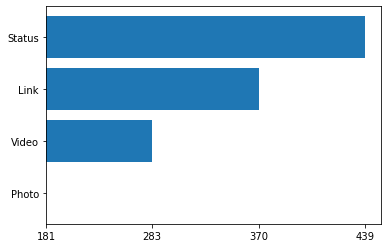

In [212]:
X = ['Photo','Video','Link','Status']
Y = ['181','283','370','439']


plt.barh(X, Y)
 
plt.show()

In [ ]:
#Status posts have highest avg. no of reactions